## Importing libraries

In [18]:
# Data processing  
# -----------------------------------------------------------------------  
import pandas as pd  
import numpy as np

# Pandas options  
# -----------------------------------------------------------------------  
pd.options.display.max_colwidth = None
 
# Path configuration for custom module imports  
# -----------------------------------------------------------------------  
import sys  
sys.path.append('../')  # Adds the parent directory to the path for custom module imports  

# Ignore warnings  
# -----------------------------------------------------------------------  
import warnings  
warnings.filterwarnings("ignore") 

# Custom functions
# -----------------------------------------------------------------------
from src.support_eda import plot_categoric_distribution, plot_correlation_matrix, plot_outliers, value_counts, quick_plot_numeric, plot_relation_tv, checker

## Data loading

In [3]:
df_employee_survey = pd.read_csv('../data/raw/employee_survey_data.csv')
df_general_data = pd.read_csv('../data/raw/general_data.csv')
df_manager_survey = pd.read_csv('../data/raw/manager_survey_data.csv')

Let's inspect every dataframe

In [5]:
for df in [df_general_data, df_employee_survey, df_manager_survey]:

    display(df.head())
    checker(df, 'EmployeeID')

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


Number of entries: 4410.
Number of EmployeeID distinct entries: 4410.
Number of EmployeeID duplicated: 0.
Number of EmployeeID null: 0.


,EmployeeID,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance
0,1,3.0,4.0,2.0
1,2,3.0,2.0,4.0
2,3,2.0,2.0,1.0
3,4,4.0,4.0,3.0
4,5,4.0,1.0,3.0


Number of entries: 4410.
Number of EmployeeID distinct entries: 4410.
Number of EmployeeID duplicated: 0.
Number of EmployeeID null: 0.


,EmployeeID,JobInvolvement,PerformanceRating
0,1,3,3
1,2,2,4
2,3,3,3
3,4,2,3
4,5,3,3


Number of entries: 4410.
Number of EmployeeID distinct entries: 4410.
Number of EmployeeID duplicated: 0.
Number of EmployeeID null: 0.


We see that all the tables share `EmployeeID` uniquely without duplicates. Therefore, we can join all the dataframes into a single one.

In [8]:
df = df_general_data.merge(df_employee_survey, on='EmployeeID').merge(df_manager_survey, on='EmployeeID')

We check again that there are no duplicates.

In [9]:
df.duplicated().sum()

0

Now let's see which columns might be of interest to us.

In [10]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager,EnvironmentSatisfaction,JobSatisfaction,WorkLifeBalance,JobInvolvement,PerformanceRating
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,6,1,0,0,3.0,4.0,2.0,3,3
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,6.0,3,5,1,4,3.0,2.0,4.0,2,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,5.0,2,5,0,3,2.0,2.0,1.0,3,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,13.0,5,8,7,5,4.0,4.0,3.0,2,3
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,9.0,2,6,0,4,4.0,1.0,3.0,3,3


In [11]:
for col in df.columns.to_list():
    print(f"Current column: {col}")
    display(value_counts(df, col).head())
    print("\n------------------------\n")

Current column: Age
The number of unique values for this category is 43


,count,proportion
Age,,
35,234,0.05
34,231,0.05
31,207,0.05
36,207,0.05
29,204,0.05



------------------------

Current column: Attrition
The number of unique values for this category is 2


,count,proportion
Attrition,,
No,3699,0.84
Yes,711,0.16



------------------------

Current column: BusinessTravel
The number of unique values for this category is 3


,count,proportion
BusinessTravel,,
Travel_Rarely,3129,0.71
Travel_Frequently,831,0.19
Non-Travel,450,0.10



------------------------

Current column: Department
The number of unique values for this category is 3


,count,proportion
Department,,
Research & Development,2883,0.65
Sales,1338,0.30
Human Resources,189,0.04



------------------------

Current column: DistanceFromHome
The number of unique values for this category is 29


,count,proportion
DistanceFromHome,,
2,633,0.14
1,624,0.14
10,258,0.06
9,255,0.06
3,252,0.06



------------------------

Current column: Education
The number of unique values for this category is 5


,count,proportion
Education,,
3,1716,0.39
4,1194,0.27
2,846,0.19
1,510,0.12
5,144,0.03



------------------------

Current column: EducationField
The number of unique values for this category is 6


,count,proportion
EducationField,,
Life Sciences,1818,0.41
Medical,1392,0.32
Marketing,477,0.11
Technical Degree,396,0.09
Other,246,0.06



------------------------

Current column: EmployeeCount
The number of unique values for this category is 1


,count,proportion
EmployeeCount,,
1,4410,1.0



------------------------

Current column: EmployeeID
The number of unique values for this category is 4410


,count,proportion
EmployeeID,,
1,1,0.0
2938,1,0.0
2944,1,0.0
2943,1,0.0
2942,1,0.0



------------------------

Current column: Gender
The number of unique values for this category is 2


,count,proportion
Gender,,
Male,2646,0.6
Female,1764,0.4



------------------------

Current column: JobLevel
The number of unique values for this category is 5


,count,proportion
JobLevel,,
1,1629,0.37
2,1602,0.36
3,654,0.15
4,318,0.07
5,207,0.05



------------------------

Current column: JobRole
The number of unique values for this category is 9


,count,proportion
JobRole,,
Sales Executive,978,0.22
Research Scientist,876,0.20
Laboratory Technician,777,0.18
Manufacturing Director,435,0.10
Healthcare Representative,393,0.09



------------------------

Current column: MaritalStatus
The number of unique values for this category is 3


,count,proportion
MaritalStatus,,
Married,2019,0.46
Single,1410,0.32
Divorced,981,0.22



------------------------

Current column: MonthlyIncome
The number of unique values for this category is 1349


,count,proportion
MonthlyIncome,,
23420,12,0.0
61420,9,0.0
27410,9,0.0
26100,9,0.0
23800,9,0.0



------------------------

Current column: NumCompaniesWorked
The number of unique values for this category is 10


,count,proportion
NumCompaniesWorked,,
1.0,1558,0.35
0.0,586,0.13
3.0,474,0.11
2.0,438,0.10
4.0,415,0.09



------------------------

Current column: Over18
The number of unique values for this category is 1


,count,proportion
Over18,,
Y,4410,1.0



------------------------

Current column: PercentSalaryHike
The number of unique values for this category is 15


,count,proportion
PercentSalaryHike,,
11,630,0.14
13,627,0.14
14,603,0.14
12,594,0.13
15,303,0.07



------------------------

Current column: StandardHours
The number of unique values for this category is 1


,count,proportion
StandardHours,,
8,4410,1.0



------------------------

Current column: StockOptionLevel
The number of unique values for this category is 4


,count,proportion
StockOptionLevel,,
0,1893,0.43
1,1788,0.41
2,474,0.11
3,255,0.06



------------------------

Current column: TotalWorkingYears
The number of unique values for this category is 40


,count,proportion
TotalWorkingYears,,
10.0,605,0.14
6.0,375,0.09
8.0,307,0.07
9.0,287,0.07
5.0,264,0.06



------------------------

Current column: TrainingTimesLastYear
The number of unique values for this category is 7


,count,proportion
TrainingTimesLastYear,,
2,1641,0.37
3,1473,0.33
4,369,0.08
5,357,0.08
1,213,0.05



------------------------

Current column: YearsAtCompany
The number of unique values for this category is 37


,count,proportion
YearsAtCompany,,
5,588,0.13
1,513,0.12
3,384,0.09
2,381,0.09
10,360,0.08



------------------------

Current column: YearsSinceLastPromotion
The number of unique values for this category is 16


,count,proportion
YearsSinceLastPromotion,,
0,1743,0.40
1,1071,0.24
2,477,0.11
7,228,0.05
4,183,0.04



------------------------

Current column: YearsWithCurrManager
The number of unique values for this category is 18


,count,proportion
YearsWithCurrManager,,
2,1032,0.23
0,789,0.18
7,648,0.15
3,426,0.10
8,321,0.07



------------------------

Current column: EnvironmentSatisfaction
The number of unique values for this category is 4


,count,proportion
EnvironmentSatisfaction,,
3.0,1350,0.31
4.0,1334,0.30
2.0,856,0.20
1.0,845,0.19



------------------------

Current column: JobSatisfaction
The number of unique values for this category is 4


,count,proportion
JobSatisfaction,,
4.0,1367,0.31
3.0,1323,0.30
1.0,860,0.20
2.0,840,0.19



------------------------

Current column: WorkLifeBalance
The number of unique values for this category is 4


,count,proportion
WorkLifeBalance,,
3.0,2660,0.61
2.0,1019,0.23
4.0,454,0.10
1.0,239,0.05



------------------------

Current column: JobInvolvement
The number of unique values for this category is 4


,count,proportion
JobInvolvement,,
3,2604,0.59
2,1125,0.26
4,432,0.10
1,249,0.06



------------------------

Current column: PerformanceRating
The number of unique values for this category is 2


,count,proportion
PerformanceRating,,
3,3732,0.85
4,678,0.15



------------------------



The columns whose values are the same for all entries are `EmployeeCount`, `EmployeeID`, `Over18`, and `StandardHours`, so we remove them.

We also remove `EmployeeID` as it is simply the unique identifier for each employee.

In [12]:
df.drop(columns=['EmployeeCount', 'EmployeeID', 'Over18', 'StandardHours'], inplace=True)

We check for duplicates again.

In [13]:
df.duplicated().sum()

2837

We see that now we have duplicates again. Why does this happen if we’ve only removed the ID and the columns without information?

It could be that two different employees share the same characteristics. However, it is practically impossible to have multiple employees with exactly the same values for 'Age', 'Attrition', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education', 'EducationField', 'Gender', 'JobLevel', 'JobRole', 'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked', 'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion', 'YearsWithCurrManager', 'EnvironmentSatisfaction', 'JobSatisfaction', 'WorkLifeBalance', 'JobInvolvement', and 'PerformanceRating'.  

And in the event such entries exist... it’s nearly impossible for them to be so numerous. To be sure, we should refer to the data source to confirm whether this is an error, since it’s assumed that different IDs already represent unique employees. Given the situation we just described, it is much more likely that these are duplicates rather than employees with identical characteristics, so we will remove these duplicates.

In [15]:
df.drop_duplicates(inplace=True)

Now we have no duplicates

In [16]:
df.duplicated().sum()

0

In [17]:
df.shape[0]

1573

But we only have 1573 unique entries.

### Numeric columns

In [19]:
num_cols = df.select_dtypes(include=np.number).columns

In [23]:
df.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
Age,1573.0,36.90,9.11,18.0,30.0,36.0,43.0,60.0
DistanceFromHome,1573.0,9.16,8.12,1.0,2.0,7.0,14.0,29.0
Education,1573.0,2.91,1.02,1.0,2.0,3.0,4.0,5.0
JobLevel,1573.0,2.06,1.11,1.0,1.0,2.0,3.0,5.0
MonthlyIncome,1573.0,64979.46,47121.74,10090.0,28990.0,49000.0,83800.0,199990.0
NumCompaniesWorked,1554.0,2.70,2.51,0.0,1.0,2.0,4.0,9.0
PercentSalaryHike,1573.0,15.20,3.65,11.0,12.0,14.0,18.0,25.0
StockOptionLevel,1573.0,0.79,0.85,0.0,0.0,1.0,1.0,3.0
TotalWorkingYears,1564.0,11.25,7.75,0.0,6.0,10.0,15.0,40.0
TrainingTimesLastYear,1573.0,2.81,1.29,0.0,2.0,3.0,3.0,6.0


Age


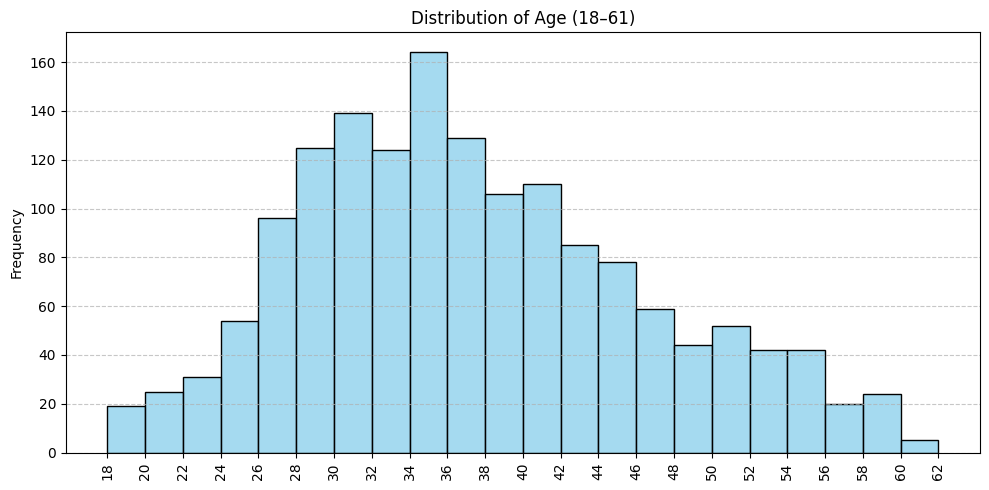

DistanceFromHome


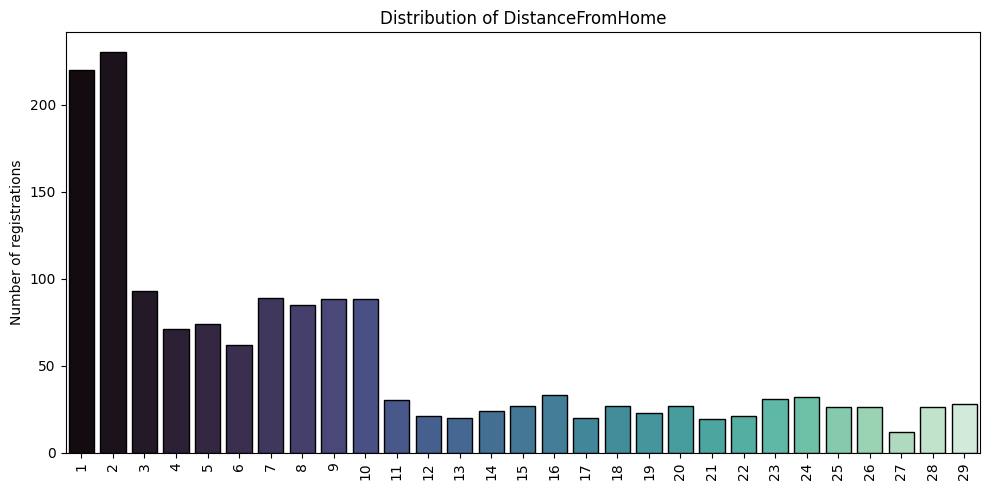

Education


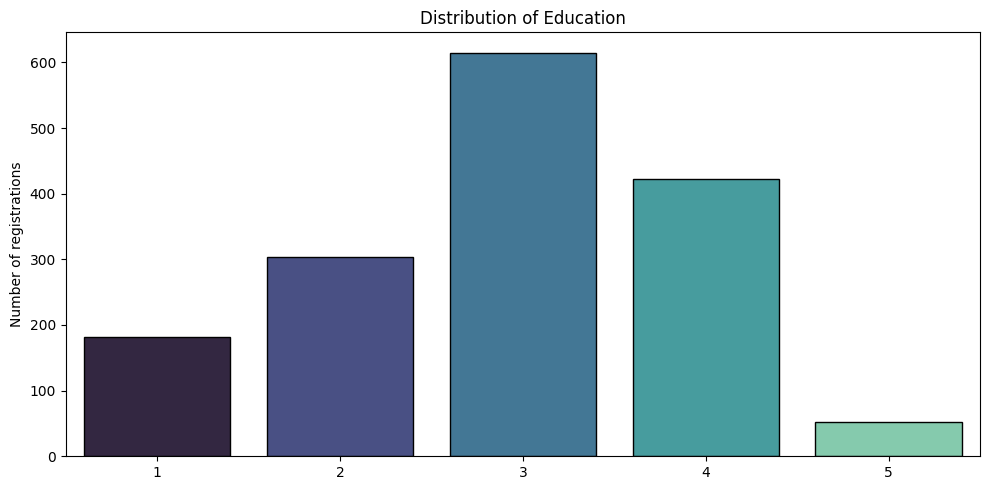

JobLevel


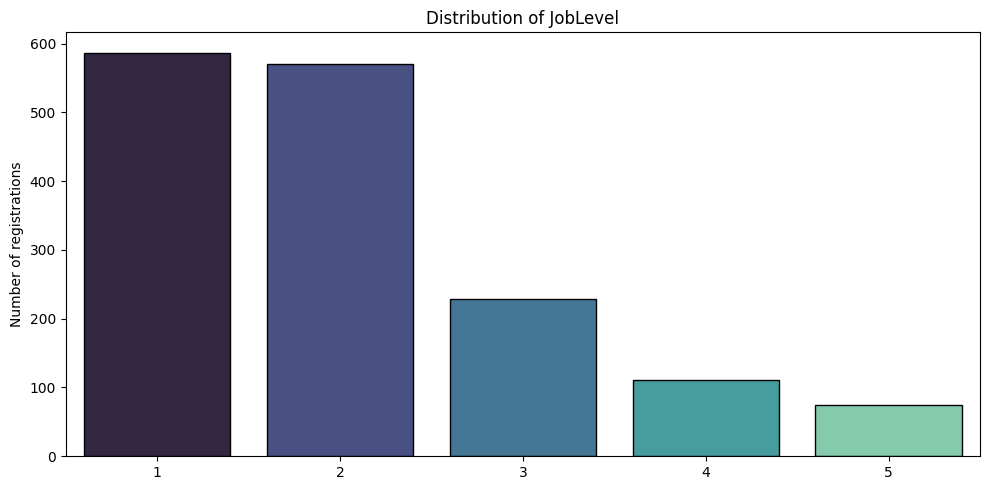

MonthlyIncome


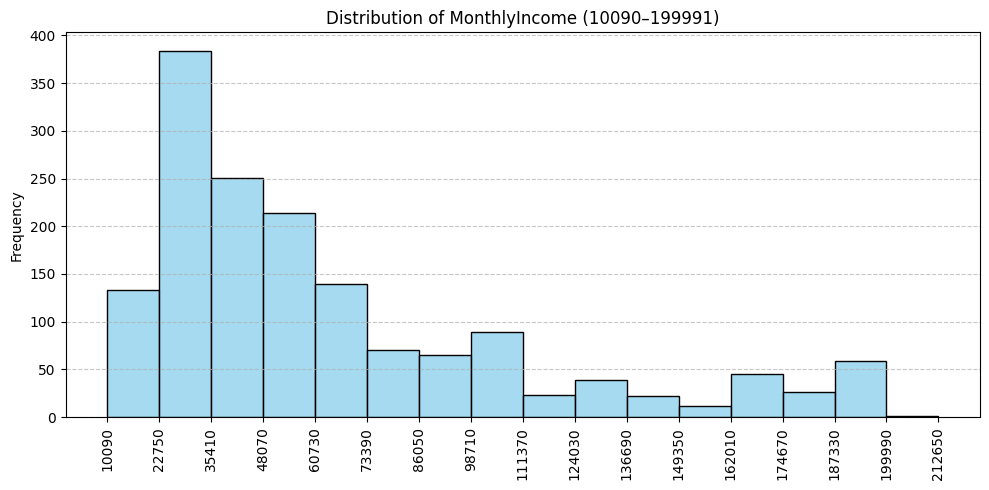

NumCompaniesWorked


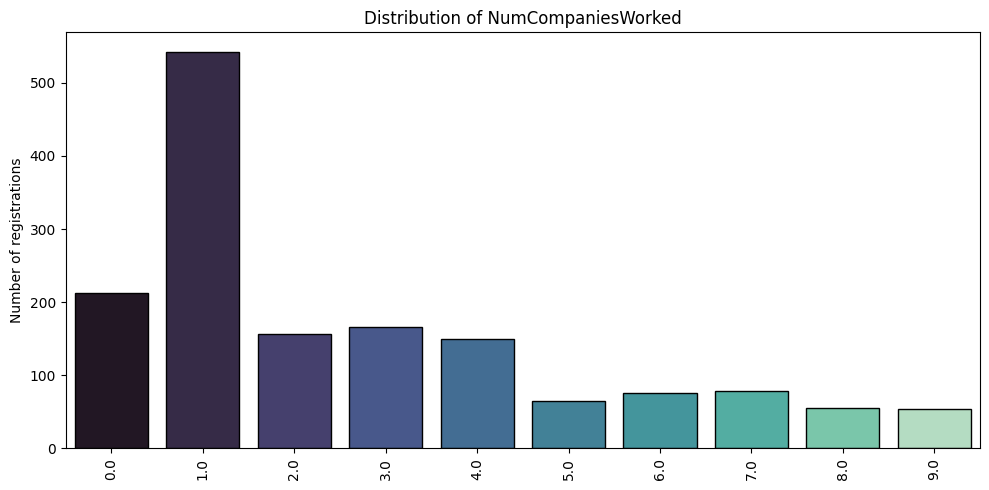

PercentSalaryHike


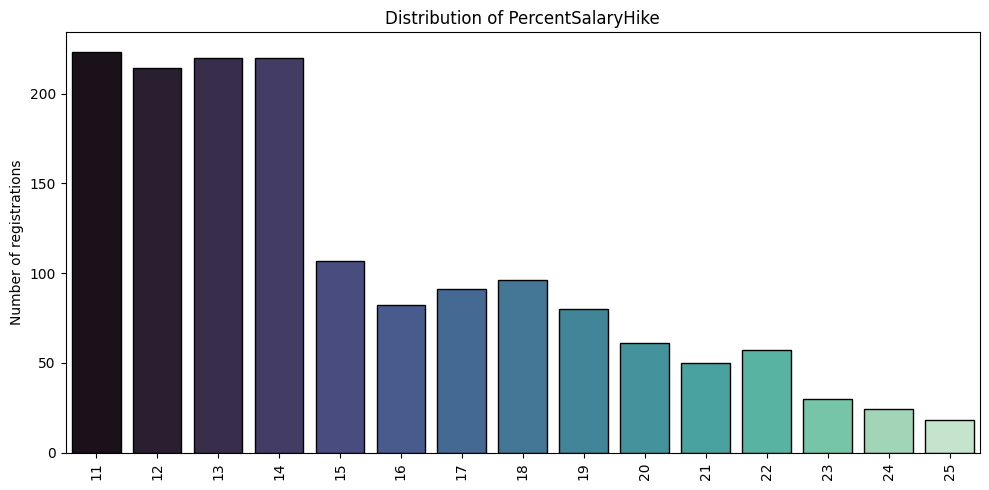

StockOptionLevel


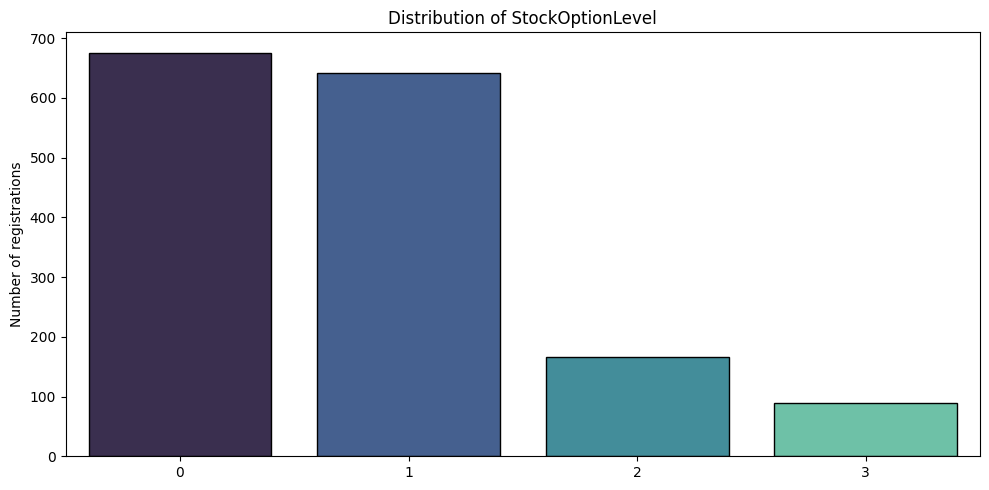

TotalWorkingYears


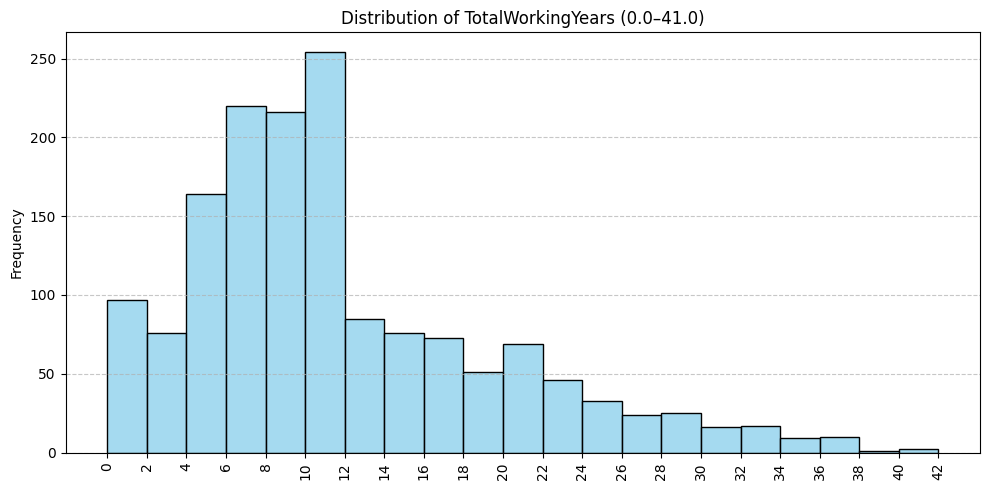

TrainingTimesLastYear


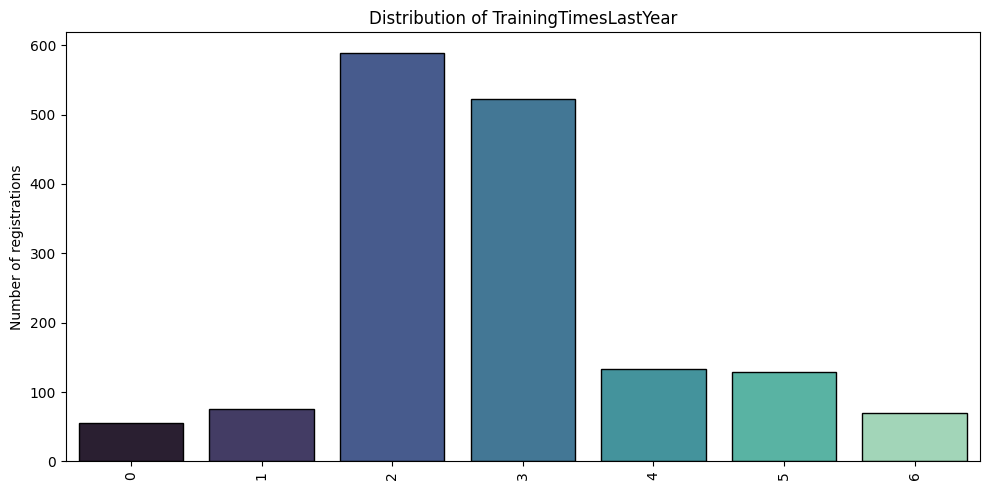

YearsAtCompany


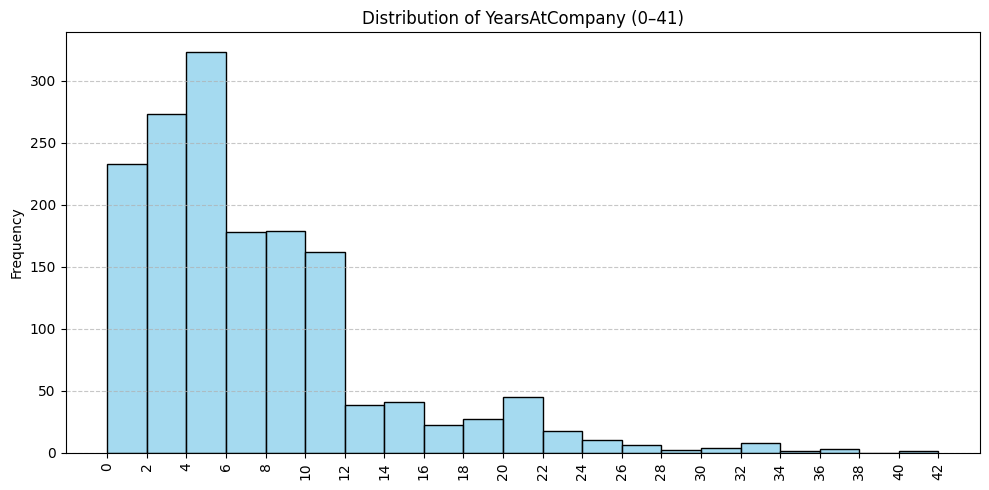

YearsSinceLastPromotion


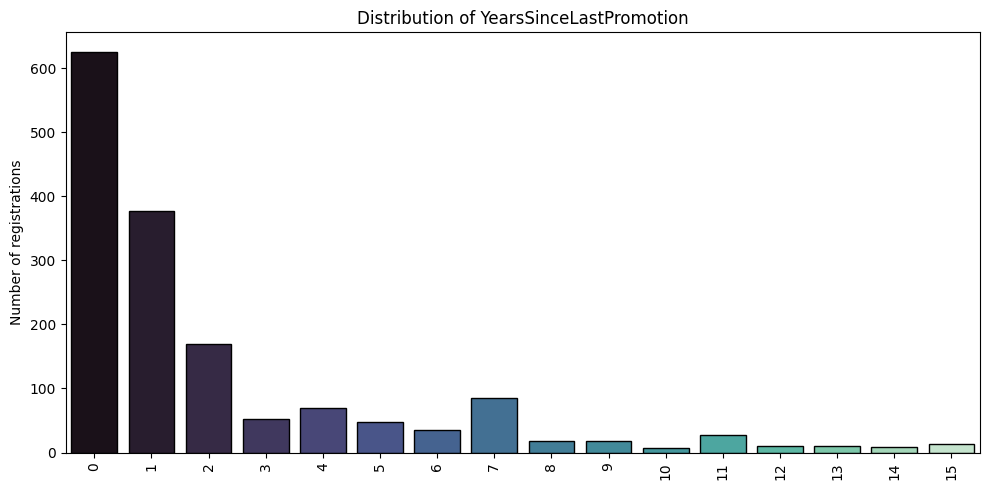

YearsWithCurrManager


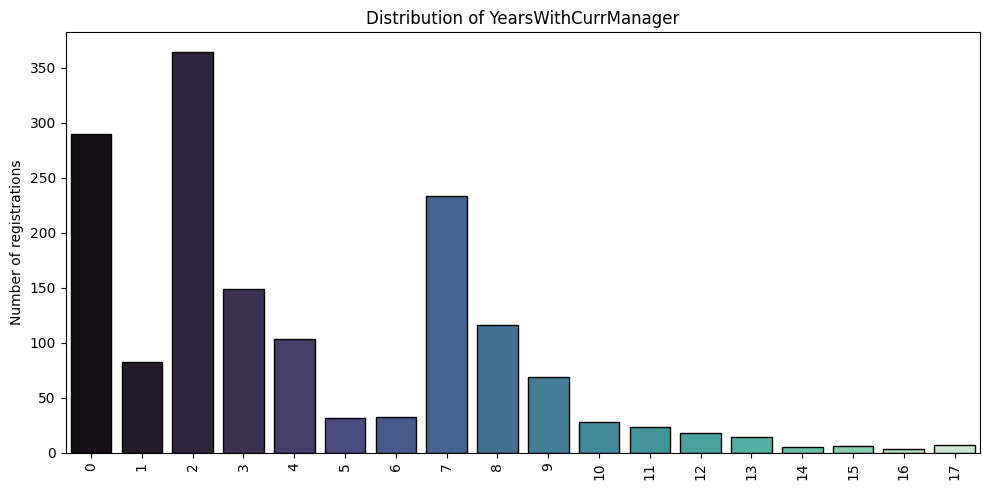

EnvironmentSatisfaction


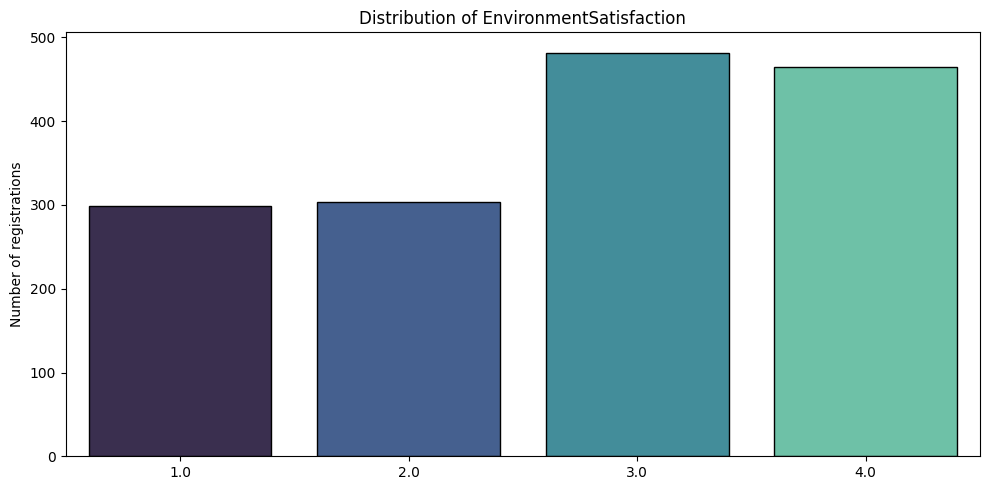

JobSatisfaction


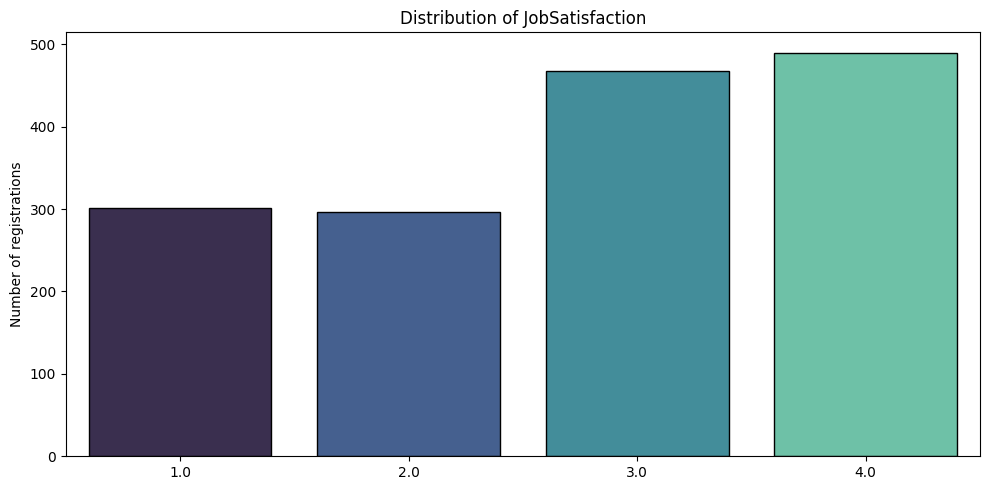

WorkLifeBalance


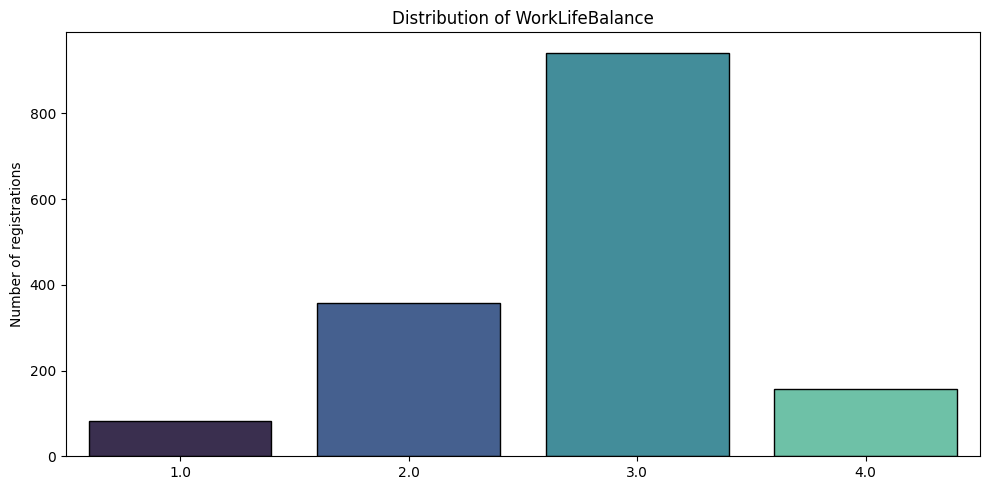

JobInvolvement


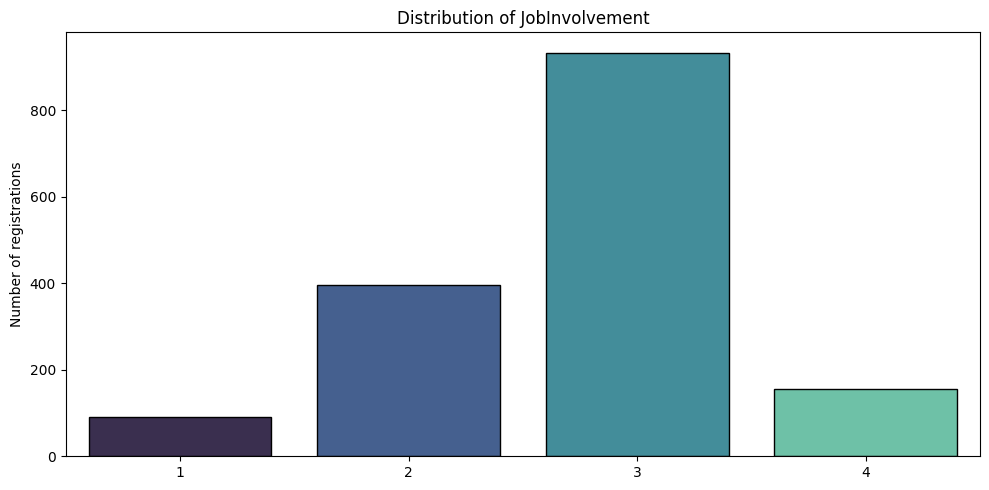

PerformanceRating


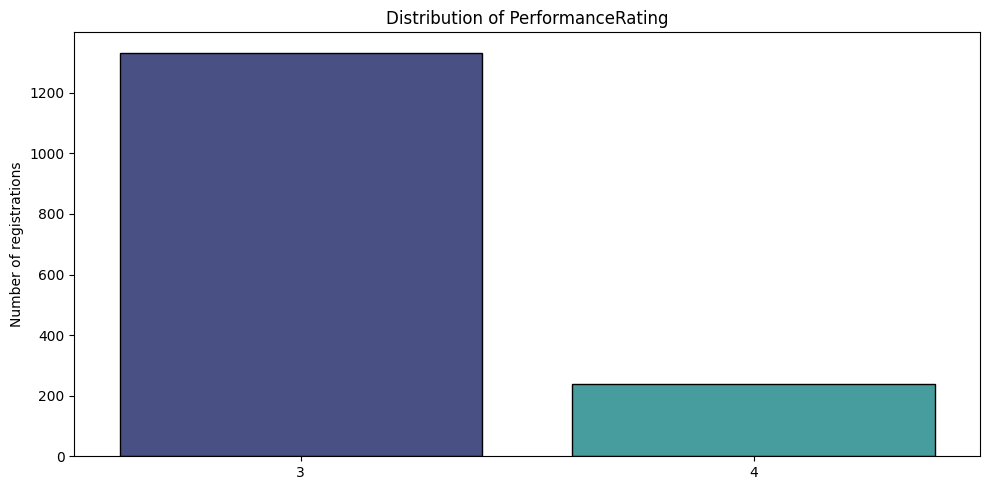

In [21]:
for col in num_cols:
    print(col)
    
    rot = 90 if df[col].nunique() > 5 else 0
    quick_plot_numeric(df, col, 15, rotation=rot)

* `Age`: The age distribution appears quite normal and similar to a typical population pyramid. The minimum value is 18, the usual legal working age, and the maximum is 60, close to the typical retirement age.  

* `DistanceFromHome`: Most employees are concentrated in areas close to the company, gradually dispersing toward values up to 30 km.  

* `Education`: Most employees have an education level of 3 (Bachelor), followed by 4 (Master) and 2 (College). Few employees have a level 1 (Below College) or 5 (Doctor), which is as expected.  

* `JobLevel`: Most employees hold positions at level 1 or 2, while the number of employees at levels 3, 4, and 5 decreases progressively. We lack information about the meaning of these levels, but they likely indicate the responsibility level of the position.  

* `MonthlyIncome`: Monthly income is distributed asymmetrically, peaking in the lower-income range, which is also representative of a population.  

* `NumCompaniesWorked`: The minimum value is 0, which could be interpreted as an error or the number of companies worked for before the current one. Since we lack additional information, we will assume the latter. The distribution is especially concentrated around 1, which is reasonable.  

* `PercentSalaryHike`: The percentage of salary increase in the last year. Most employees have an increase between 11% and 14%, with decreasing frequencies up to 25%.  

* `StockOptionLevel`: Options to receive company shares as part of the salary. Most employees are concentrated at levels 0 and 1, but we lack precise information about their meaning.  

* `TotalWorkingYears`: The total number of years worked by the employee. Its distribution is similar to that of age and is possibly correlated.  

* `TrainingTimesLastYear`: Number of training sessions attended in the last year. Most employees attended 2 or 3 sessions, with some reaching up to 6, while others attended none.  

* `YearsAtCompany`: The number of years the employee has been with the current company. Its behavior is similar to age and total working years but shifted to lower values, influenced by staff turnover.  

* `YearsSinceLastPromotion`: The number of years since the last promotion. Most values are concentrated closer to 0. Here, two factors must be considered: the number of years the employee has been with the company and possible turnover or departures due to lack of promotions.  

* `YearsWithCurrentManager`: Years with the same manager. The general trend decreases with years but shows more irregularities. This property is more complex as it is influenced not only by the above but also by all situations that could lead to a change in manager.  

* `EnvironmentSatisfaction`: Employee satisfaction with the work environment. More people are satisfied (levels 3 and 4) than dissatisfied (levels 1 and 2), although the difference is not significant.  

* `JobSatisfaction`: Overall satisfaction with the job. Its trend is similar to the previous one.  

* `WorkLifeBalance`: Balance between personal and work life. Most entries are positive (3), although they are less evenly distributed in this case.  

* `JobInvolvement`: The degree to which a person feels committed, interested, and emotionally connected to their job. Its distribution is very similar to the previous one.  

* `PerformanceRating`: Performance metric. All entries have a value of 3 or 4, i.e., excellent or outstanding. There are no employees with simply good or poor ratings.  

### Categoric columns

In [24]:
cat_cols = df.select_dtypes(include=['O', 'category'])

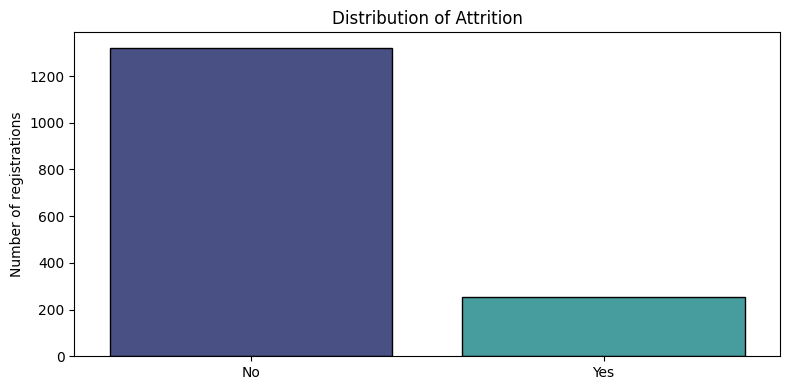

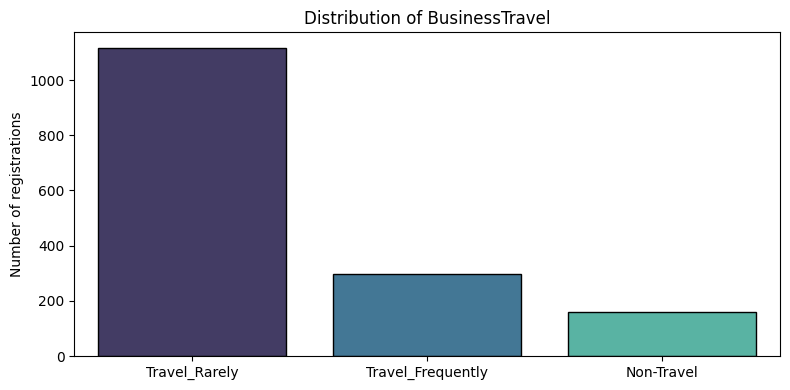

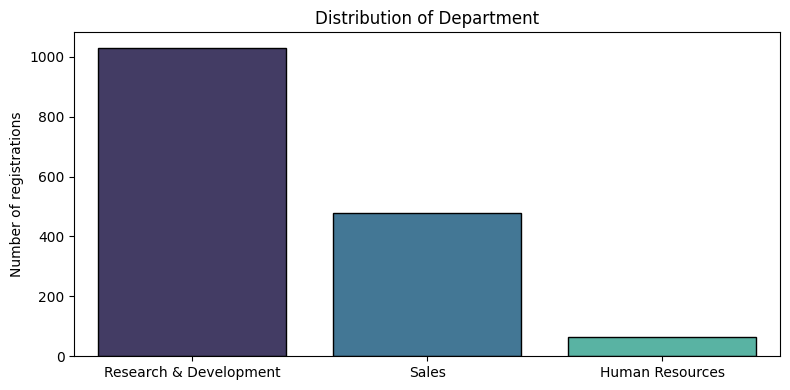

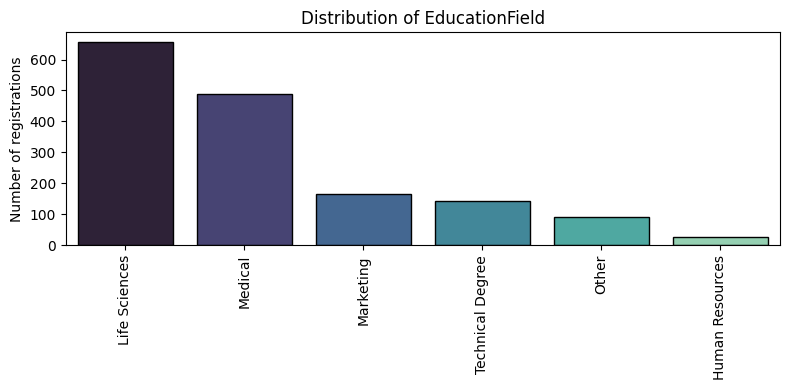

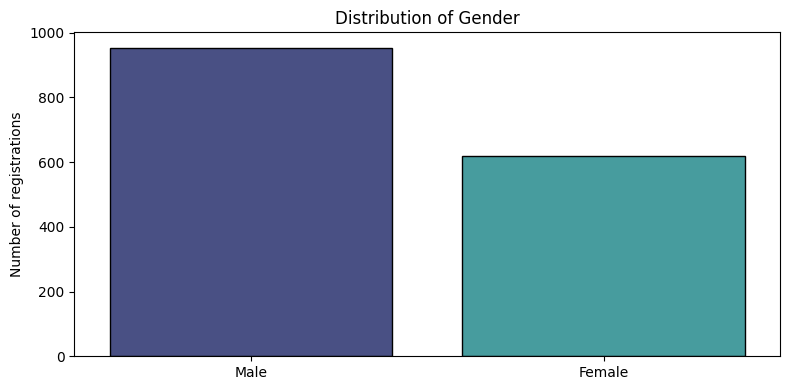

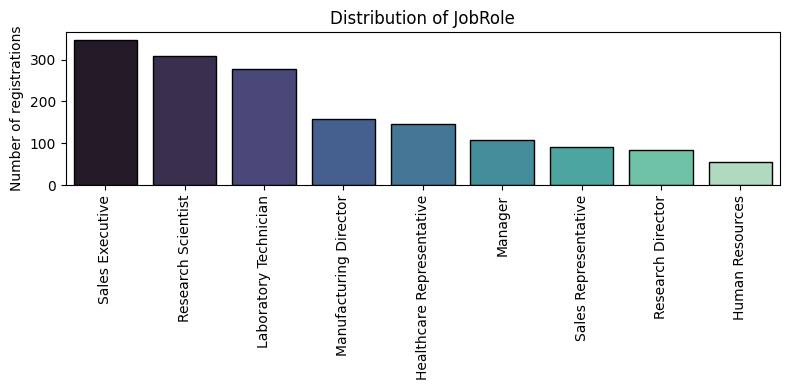

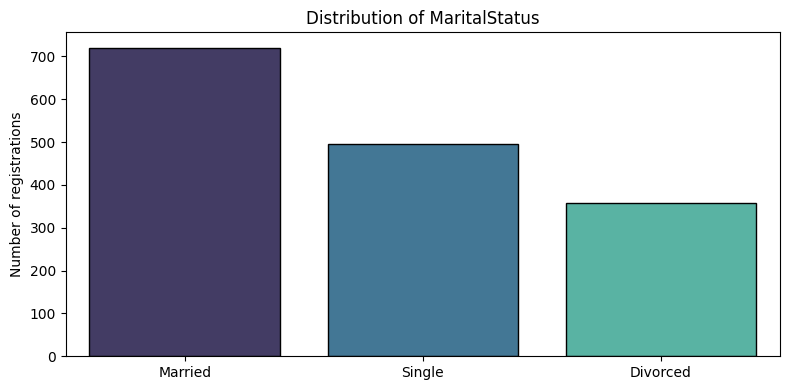

In [25]:
for col in cat_cols:

    rot = 90 if df[col].nunique() > 5 else 0

    plot_categoric_distribution(df, col, rotation=rot)

* `Attrition`: This is our target variable. We see that it is imbalanced, with most employees not leaving the company. However, we may have enough 'Yes' values to build an adequate predictive model. If not, we will consider balancing the dataset.  

* `BusinessTravel`: Most employees travel infrequently, with a small proportion who never travel and another who travel frequently.  

* `Department`: There are only three departments. The most represented is Research and Development, while the least is Human Resources.  

* `EducationField`: Most employees have studied Life Sciences or Medical fields. Marketing, Technical Degree, Human Resources, and others are less represented.  

* `Gender`: There are more men than women, approximately 60-40%, so the distribution is not overly imbalanced.  

* `JobRole`: The different roles are fairly distributed, with a higher presence of Sales Executives, Research Scientists, and Laboratory Technicians.  

* `MaritalStatus`: The most common status is Married, followed by Single and Divorced.  

---

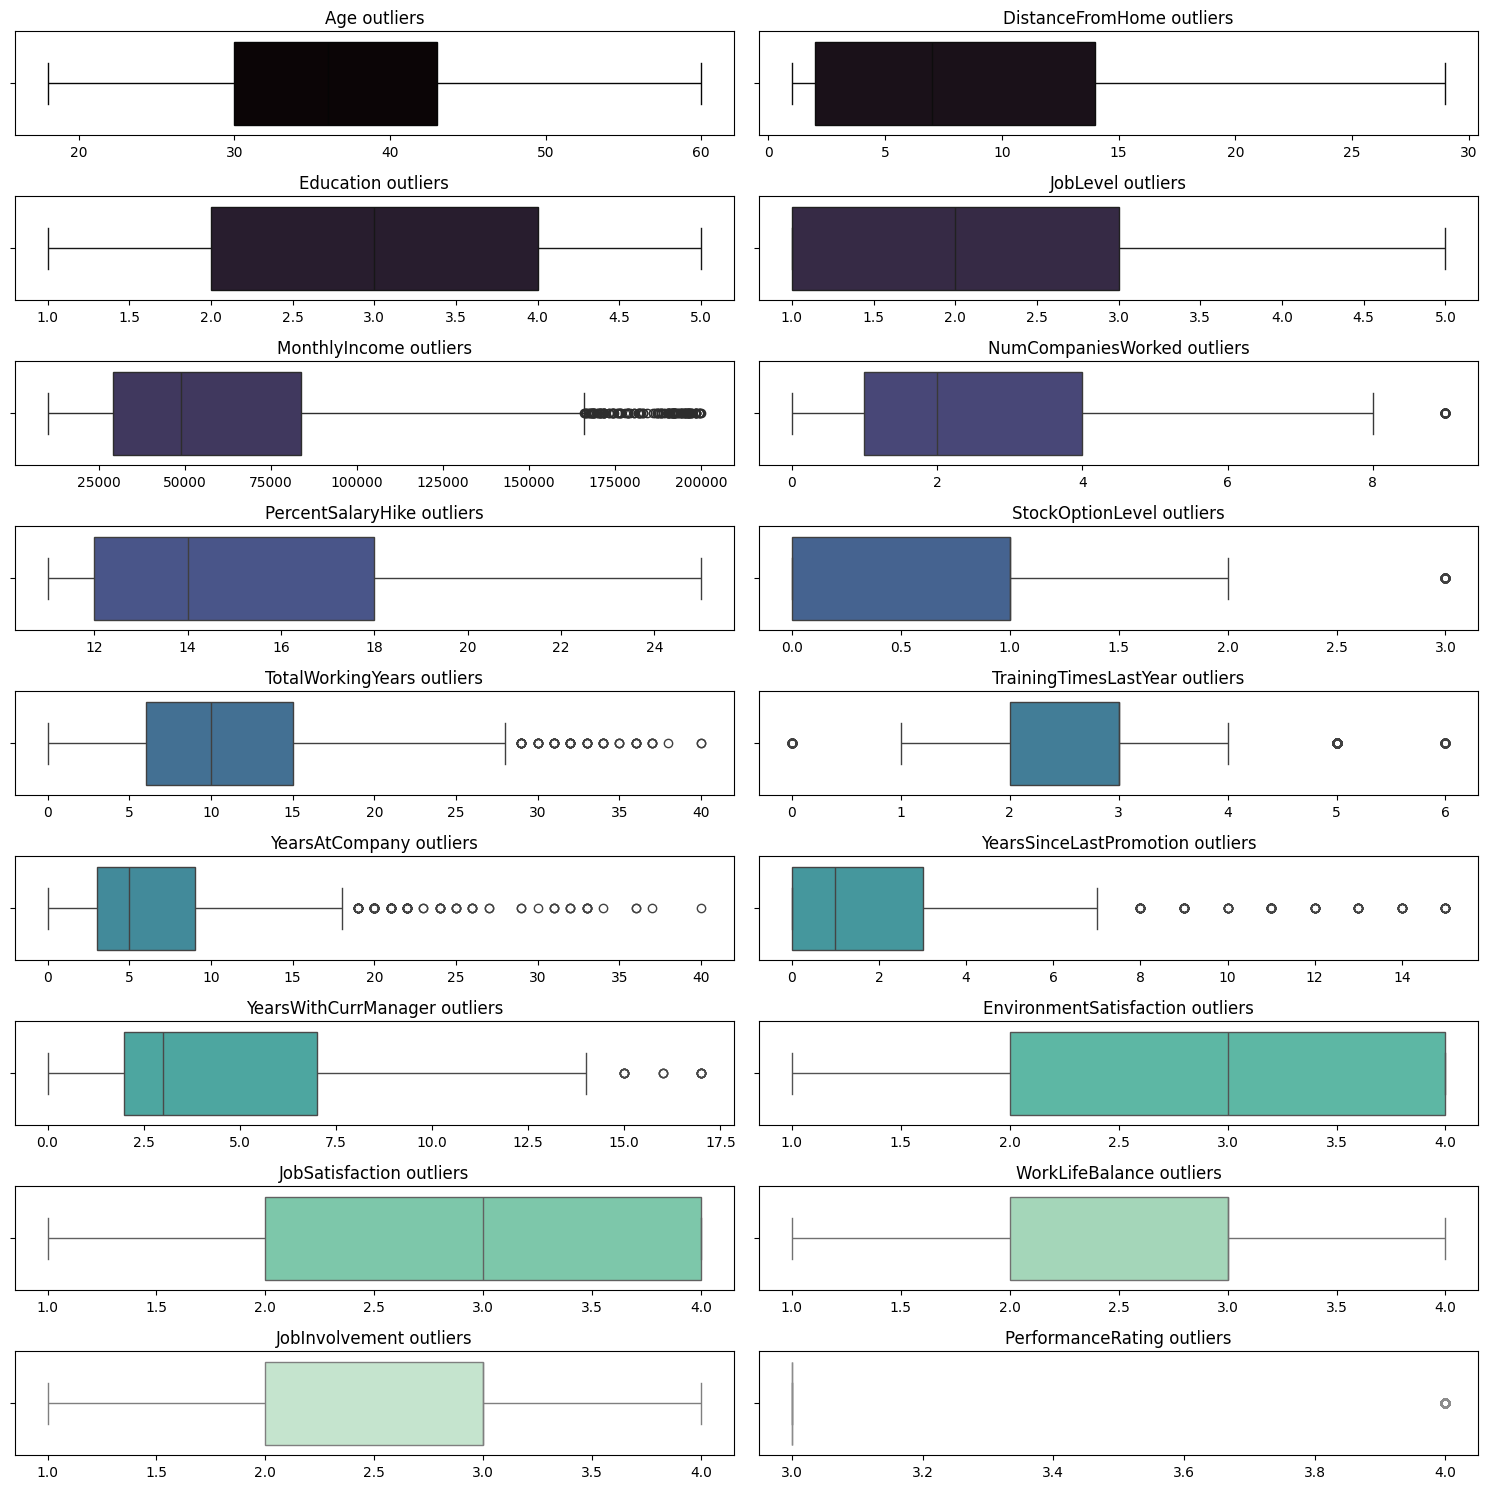

In [26]:
plot_outliers(df, size = (15, 15))

The outliers in the numerical variables mainly correspond to the tails of the age and salary distributions discussed earlier.

---

## Plot target variable relationships

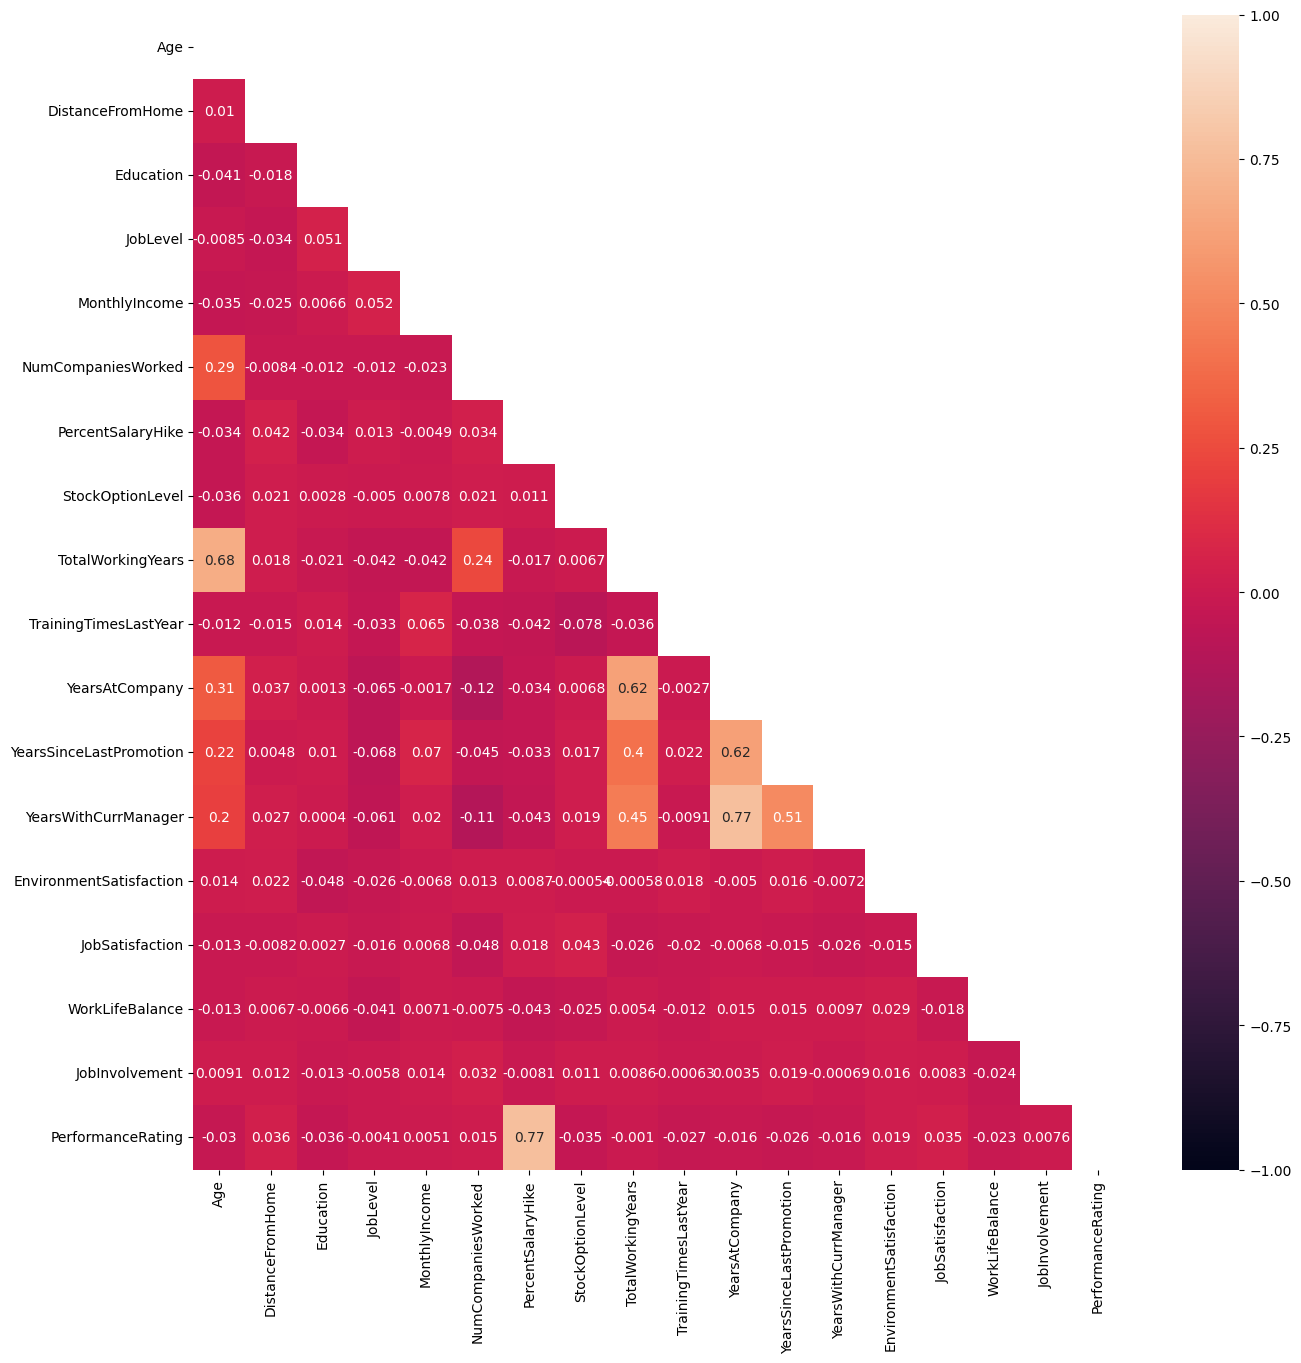

In [27]:
plot_correlation_matrix(df, size = (15, 15))

We observe some interesting correlations.

`YearsWithCurrManager`: has a very high correlation with `YearsAtCompany`. We will remove it since we can assume they explain the same thing.

`PerformanceRating`: has a very high correlation with `PercentSalaryHike`. We will also remove it for the same reason.

With a strong positive correlation, though not as high as the previous ones, we find `YearsAtCompany`-`TotalWorkingYears`, `YearsSinceLastPromotion`-`YearsAtCompany`-`YearsWithCurrManager`-`Age`.

We could keep only one of these variables, but we will remove only those with the strongest correlations (above 0.75).

In [29]:
df.drop(columns=['YearsWithCurrManager', 'PerformanceRating'], inplace=True)

## Cross relationships

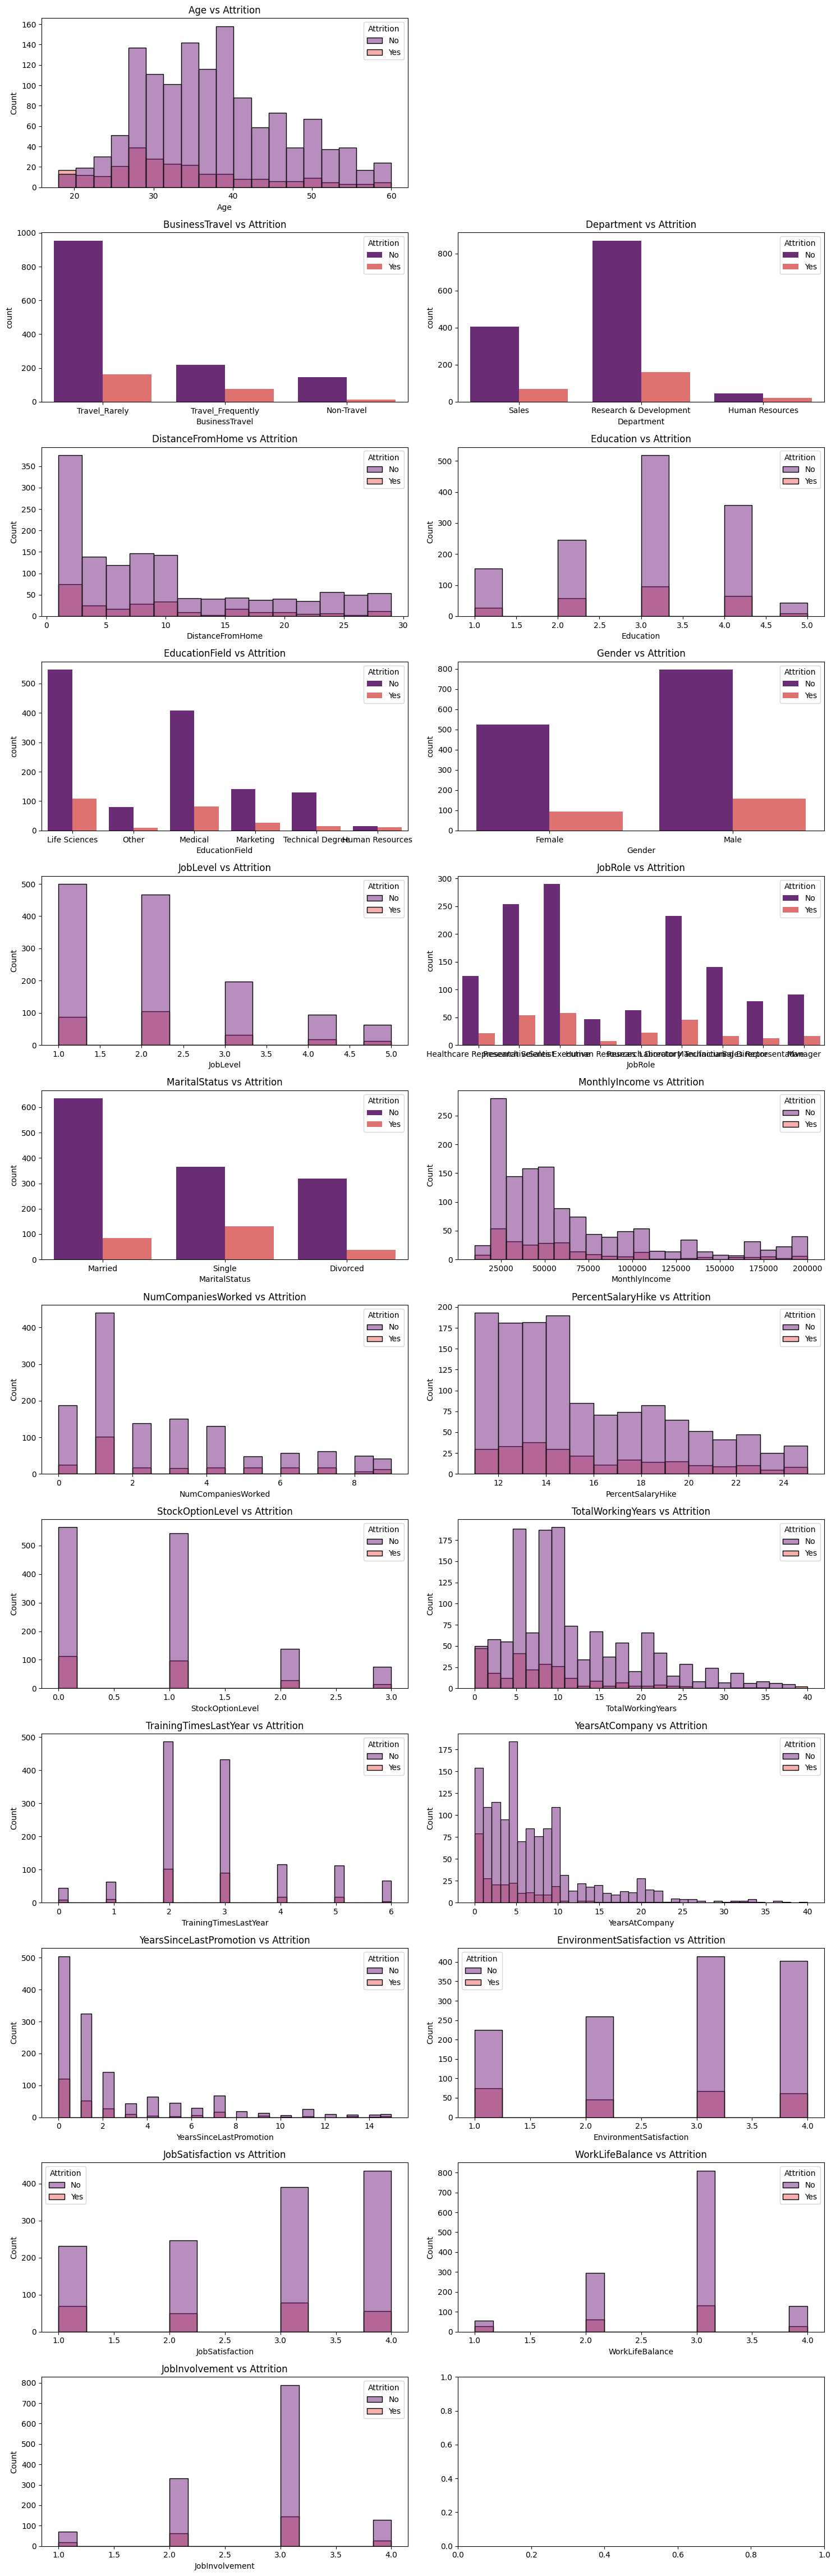

In [30]:
plot_relation_tv(df, 'Attrition', size=(15, 2 * len(df.columns)), n_cols=2)

Let’s discuss some of the most interesting conclusions. `Attrition` appears to be higher in proportion among people who are:  

* Younger.  

* Have spent little time at the company or have fewer years of work experience overall.  

* Have low job, environmental, or work-life balance satisfaction.  

## Data save

In [31]:
df.to_csv('../data/output/complete_data.csv') 